In [45]:
# import all libraries required in the code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

# read in the data from the supplied assignment file and check input via table 
df = pd.read_csv("data_assignment.csv")

def open_data_file(fileName):
    opened_file = open(fileName)
    from csv import reader
    readFile = reader(opened_file)
    data = list(readFile)

    return data

assignData = open_data_file(fileName = "data_assignment.csv") 


In [148]:
# Describe the dataset (e.g.: type of column, value range)
# How many rows (first # outputted) and columns are in the dataset
print(f'Describe the dataset:')
print(f'Shape {df.shape},')
print(f'Column Headers {df.columns}')

# This can be deleted later as using for information on table c

Describe the dataset:
Shape (149999, 13),
Column Headers Index(['Id', 'Title', 'Company', 'Date', 'Location', 'Area', 'Classification',
       'SubClassification', 'Requirement', 'FullDescription', 'LowestSalary',
       'HighestSalary', 'JobType'],
      dtype='object')


In [150]:
df.head(2)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN


In [83]:
# Which city has more jobs? 

selectedCity1 = 'Sydney'
selectedCity2 = 'Brisbane'

# Count the number of times Brisbane is in the data table and assume each is for a job
brisNumber2 = (df["Location"].value_counts().loc["Brisbane"])

# Count the number of times Brisbane is in the data table and assume each is for a job
sydneyNumber1 = (df["Location"].value_counts().loc["Sydney"])

print(f'{selectedCity1} has {sydneyNumber1} jobs, while {selectedCity2} has {brisNumber2} jobs.')




Sydney has 46357 jobs, while Brisbane has 16538 jobs.


In [214]:
# Setup Dictionaries for Selected cities Sydney and Brisbane so we can count the number of jobs per Job Type and the top jobs per Classification

#selectedCity1 = 'Sydney'
subclasses = []
for i in range(len(df['Location'])):
    if df['Location'][i] == selectedCity1:
        subclasses.append(df['Classification'][i])

# Use a dict to count dupes
SydCityJobCount = {}
for i in range(len(subclasses)):
    if subclasses[i] not in SydCityJobCount:
        SydCityJobCount[subclasses[i]] = 1
    else:
        count = SydCityJobCount[subclasses[i]]
        SydCityJobCount[subclasses[i]] = count + 1

# setup Job Type Numbers
jobclasses1 = []

for i in range(len(df['Location'])):
    if df['Location'][i] == selectedCity1:
        jobclasses1.append(df['JobType'][i])

# Use a dict to count duplicate Classifications
SydCityJobTypeCount = {}
for i in range(len(jobclasses1)):
    if jobclasses1[i] not in SydCityJobTypeCount:
        SydCityJobTypeCount[jobclasses1[i]] = 1
    else:
        count = SydCityJobTypeCount[jobclasses1[i]]
        SydCityJobTypeCount[jobclasses1[i]] = count + 1  

# Get top 5 Companies
Compamyclasses1 = []

for i in range(len(df['Location'])):
    if df['Location'][i] == selectedCity1:
        Compamyclasses1.append(df['Company'][i])

# Use a dict to count duplicate Classifications
SydCityCompanyCount = {}
for i in range(len(Compamyclasses1)):
    if Compamyclasses1[i] not in SydCityCompanyCount:
        SydCityCompanyCount[Compamyclasses1[i]] = 1
    else:
        count = SydCityCompanyCount[Compamyclasses1[i]]
        SydCityCompanyCount[Compamyclasses1[i]] = count + 1  


# Details for the second selected city - Brisbane

#selectedCity2 = 'Brisbane'
subclasses2 = []

for i in range(len(df['Location'])):
    if df['Location'][i] == selectedCity2:
        subclasses2.append(df['Classification'][i])

# Use a dict to count duplicate Classifications
BrisCityJobCount = {}
for i in range(len(subclasses2)):
    if subclasses2[i] not in BrisCityJobCount:
        BrisCityJobCount[subclasses2[i]] = 1
    else:
        count = BrisCityJobCount[subclasses2[i]]
        BrisCityJobCount[subclasses2[i]] = count + 1

# Number of Jobs in Brisbane by Type
jobclasses2 = []

for i in range(len(df['Location'])):
    if df['Location'][i] == selectedCity2:
        jobclasses2.append(df['JobType'][i])

# Use a dict to count duplicate Classifications
BrisCityJobTypeCount = {}
for i in range(len(jobclasses2)):
    if jobclasses2[i] not in BrisCityJobTypeCount:
        BrisCityJobTypeCount[jobclasses2[i]] = 1
    else:
        count = BrisCityJobTypeCount[jobclasses2[i]]
        BrisCityJobTypeCount[jobclasses2[i]] = count + 1  

# Get top 5 Companies
Compamyclasses2 = []

for i in range(len(df['Location'])):
    if df['Location'][i] == selectedCity2:
        Compamyclasses2.append(df['Company'][i])

# Use a dict to count duplicate Classifications
BrisCityCompanyCount = {}
for i in range(len(Compamyclasses2)):
    if Compamyclasses2[i] not in BrisCityCompanyCount:
        BrisCityCompanyCount[Compamyclasses2[i]] = 1
    else:
        count = BrisCityCompanyCount[Compamyclasses2[i]]
        BrisCityCompanyCount[Compamyclasses2[i]] = count + 1    



In [215]:
 #How many jobs each type (casual, fulltime, etc.) are there in each city?

# Sydney
SydCityJobTypeCount

{nan: 851,
 'Contract/Temp': 8420,
 'Full Time': 32267,
 'Part Time': 2277,
 'Casual/Vacation': 2542}

In [87]:
# How many jobs each type (casual, fulltime, etc.) are there in each city?

#Brisbane
BrisCityJobTypeCount 

{nan: 412,
 'Full Time': 10431,
 'Contract/Temp': 3164,
 'Part Time': 988,
 'Casual/Vacation': 1543}

In [88]:
#In each city, which are top 5 job sectors? How many jobs are there in each sector?
# Sort the Sydney City Dictionary and show top 5 work sectors by job number
sortedSydneyCount = sorted(SydCityJobCount.items(), key = lambda x: x[1], reverse = True)
print(f'The top 5 Job sectors in {selectedCity1} are')
sortedSydneyCount[0:5]

The top 5 Job sectors in Sydney are


[('Information & Communication Technology', 6999),
 ('Trades & Services', 3181),
 ('Accounting', 3105),
 ('Hospitality & Tourism', 3081),
 ('Manufacturing, Transport & Logistics', 2536)]

In [89]:
#newdf = df.groupby('Location'), ['Classification'].sum().sort_values()
#newdf = list(df)
sortedSydneyCount[0:5]

[('Information & Communication Technology', 6999),
 ('Trades & Services', 3181),
 ('Accounting', 3105),
 ('Hospitality & Tourism', 3081),
 ('Manufacturing, Transport & Logistics', 2536)]

In [90]:
# Sort the Brisbane City Dictionary and show top 5 work sectors by job number
sortedBrisbaneCount = sorted(BrisCityJobCount.items(), key = lambda x: x[1], reverse = True)

print(f'The top 5 Job sectors in {selectedCity2} are')
sortedBrisbaneCount[0:5]


The top 5 Job sectors in Brisbane are


[('Information & Communication Technology', 2041),
 ('Trades & Services', 1627),
 ('Healthcare & Medical', 1341),
 ('Manufacturing, Transport & Logistics', 1338),
 ('Hospitality & Tourism', 1032)]

In [91]:
# List top 5 companies in each city? Which sectors do they belong to?

#Sydney Companies
sortedSydCompanies = sorted(SydCityCompanyCount.items(), key = lambda x: x[1], reverse = True)

print(f'The top 5 Companies in {selectedCity1} are')
sortedSydCompanies[0:6]

The top 5 Companies in Sydney are


[(nan, 1477),
 ('Jora Local', 1426),
 ('Robert Walters', 448),
 ('Design & Build', 407),
 ('Bluefin Resources Pty Limited', 254),
 ('Paxus', 251)]

In [338]:
test = sortedBrisCompanies[1:6]

topCompanies = []

for i in range(len(test)):
    topCompanies.append(test[i][0])

print(topCompanies)

topCompaniesSector  = []

#for i in range(len(df['Company'])):
#   if [df['Company'] == topCompanies[row]]:
#        topCompaniesSector.append(df['Classification'][i]) 
        #topCompaniesSector.append(df['Company'][i])       

# Use a dict to count duplicate Classifications
companySectorCount = {}
counter = 0

#for i in range(len(topCompaniesSector)):
#    if topCompaniesSector[i] not in companySectorCount:
#        companySectorCount[topCompaniesSector[i]] = 1
#    else:
#        counter = companySectorCount[topCompaniesSector[i]]
#        companySectorCount[topCompaniesSector[i]] = count + 1  




companySectorCount



['Jora Local', 'u&u. Recruitment Partners', 'Hudson', 'The University of Queensland', 'Programmed Skilled Workforce']


{}

In [347]:
name = df.loc[df['Company'] == 'Hudson']

(df["Company"].value_counts().loc["Hudson"])
#(df["Location"].value_counts().loc["Brisbane"])

#name2

804

In [ ]:
#Working out the company and market
topBrisCompanies = sortedBrisCompanies[1:6]

name = df.loc[df['Company'] == 'Jora Local']
test1 = []
#name = df.loc[df['Company'] == topCompanies[1], 'Classification']
    #test1.append('Classification')

for i in range(len(df['Company'])):
    if [df['Company'] == topCompanies[row]]:
        #test1.append(df['Classification'])
        #test1.append(topCompanies[row])
        #print('Appended')
        #print(topBrisCompanies[4])
    else:
        print('No good')

test1
#topCompanies[3]

In [92]:
# List top 5 companies in each city? Which sectors do they belong to?

#Brisbane Companies

sortedBrisCompanies = sorted(BrisCityCompanyCount.items(), key = lambda x: x[1], reverse = True)

print(f'The top 5 Companies in {selectedCity2} are')
sortedBrisCompanies[0:6]

The top 5 Companies in Brisbane are


[(nan, 675),
 ('Jora Local', 238),
 ('u&u. Recruitment Partners', 191),
 ('Hudson', 187),
 ('The University of Queensland', 180),
 ('Programmed Skilled Workforce', 171)]

In [53]:
# gives Sydney as top number location with freq - number of times / jobs submitted

city = df['Location']
print(city.describe())

count     149999
unique        65
top       Sydney
freq       46357
Name: Location, dtype: object


In [54]:
print(df["Location"].value_counts().loc["Brisbane"])

16538


In [55]:
print(df["Location"].value_counts().loc["Sydney"])

46357


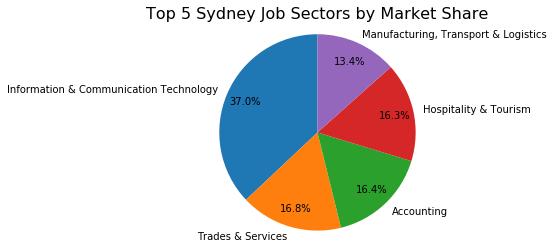

In [152]:
# Visualise the top 5 job sectors in pie chart for each city

ListCityJobCount1 = sortedSydneyCount[0:5]
Labels1 = []
Size1 = []
CutOff1 = 5
OtherCount1 = 0
for i in range(len(ListCityJobCount1)):
    if i < CutOff1:
        Labels1.append(ListCityJobCount1[i][0])
        Size1.append(ListCityJobCount1[i][1])
    else:
        OtherCount1 = OtherCount1 + ListCityJobCount1[i][1]

# Pie chart for job market share of cities
plt.pie(Size1, labels=Labels1, colors=sns.color_palette(), autopct='%1.1f%%', startangle=90, pctdistance= 0.8, radius=1)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title(f'Top 5 {selectedCity1} Job Sectors by Market Share',size=16,loc='center')
plt.show()

In [113]:
ListCityJobCount1

[('Information & Communication Technology', 6999),
 ('Trades & Services', 3181),
 ('Accounting', 3105),
 ('Hospitality & Tourism', 3081),
 ('Manufacturing, Transport & Logistics', 2536)]

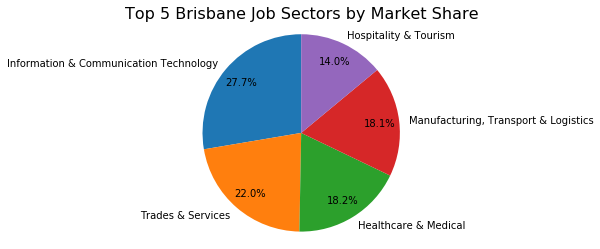

In [153]:
ListCityJobCount2 = sortedBrisbaneCount[0:5]
Labels2 = []
Size2 = []
CutOff2 = 5
OtherCount2 = 0
for i in range(len(ListCityJobCount2)):
    if i < CutOff2:
        Labels2.append(ListCityJobCount2[i][0])
        Size2.append(ListCityJobCount2[i][1])
    else:
        OtherCount2 = OtherCount2 + ListCityJobCount2[i][1]

# Pie chart for job market share of cities
plt.pie(Size2, labels=Labels2, colors=sns.color_palette(), autopct='%1.1f%%', startangle=90, pctdistance= 0.8, radius=1)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title(f'Top 5 {selectedCity2} Job Sectors by Market Share',size=16,loc='center')
plt.show()

In [63]:
first_five = np.array(sortedSydneyCount[0:5])
first_five

#plt.plot(first_five['Job'], first_five['Value'])
#plt.show()

array([['Information & Communication Technology', '6999'],
       ['Trades & Services', '3181'],
       ['Accounting', '3105'],
       ['Hospitality & Tourism', '3081'],
       ['Manufacturing, Transport & Logistics', '2536']], dtype='<U38')

In [73]:
newone = df[['Location' , 'Classification', 'JobType']]
newone.head()


,Location,Classification,JobType
0,Sydney,Retail & Consumer Products,NaN
1,Richmond & Hawkesbury,Retail & Consumer Products,NaN
2,Brisbane,Retail & Consumer Products,NaN
3,Gosford & Central Coast,Retail & Consumer Products,NaN
4,Sydney,Call Centre & Customer Service,NaN


In [151]:
newone1 = df[['Company' , 'Classification', 'JobType']]
newone1.head()



,Company,Classification,JobType
0,Aldi Stores,Retail & Consumer Products,NaN
1,Aldi Stores,Retail & Consumer Products,NaN
2,LB Creative Pty Ltd,Retail & Consumer Products,NaN
3,Anaconda Group Pty Ltd,Retail & Consumer Products,NaN
4,Commonwealth Bank - Business & Private Banking,Call Centre & Customer Service,NaN


In [ ]:
#Print the Pie Graphs in one figure

from matplotlib import pyplot as plt
import numpy as np

data1 = np.array([0.9, 0.1])
data2 = np.array([0.6, 0.4])

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# plot each pie chart in a separate subplot
ax1.pie(data1)
ax2.pie(data2)

plt.show()

In [349]:
product = df['Company'].values.tolist()
print (product[0:25])

['Aldi Stores', 'Aldi Stores', 'LB Creative Pty Ltd', 'Anaconda Group Pty Ltd', 'Commonwealth Bank - Business & Private Banking', 'Commonwealth Bank - Business & Private Banking', 'Jora Local', 'Jora Local', 'Reventon Investments', 'Jora Local', 'Hays Talent Solutions', nan, 'Mustard Catering', 'ISS Facility Services', 'Jora Local', nan, 'Hays Talent Solutions', 'Costco Wholesale', 'TLS Airport West', 'Zoom Recruitment & Training', 'Perspective Recruitment', 'Jora Local', 'Hays Talent Solutions', 'Jora Local', 'Hays Talent Solutions']
